# 2) IACOV - Model Development for Prognosis - DEATH
## Strategy 6) Training on 70% of a specific hospital plus same absolute number of all other hospitals

In [96]:
# !pip install npm nodejs

In [97]:
# !jupyter lab clean
# !jupyter lab build

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [3]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_en.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(8494, 65)

In [4]:
df_iacov_model.columns

Index(['city_hospital', 'cd_patient', 'hospital_time', 'age', 'race', 'braden',
       'heart_rate', 'resp_rate', 'sys_press', 'dias_press', 'mean_press',
       'temp', 'saturation', 'weight', 'height', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'neutr_lymph_ratio', 'lymph_crp_ratio',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'albumin', 'ldh', 'alt',
       'ast', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'urea', 'sodium', 'potassium', 'creatinine', 'troponin', 'd_dimer',
       'venous_lactate', 'cpk', 'inr', 'aptt', 'arterial_lactate', 'gas_ph',
       'gaso_po2', 'gas_paco2', 'gas_hco3', 'gas_be', 'gas_so2', 'magnesium',
       'calcium_ionised', 'total_calcium', 'glucose', 'state', 'region', 'icu',
       'death', 'mv', 'male'],
      dtype='object')

In [6]:
df_iacov_model.iloc[:,2:65].head(5)

,hospital_time,age,race,braden,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,...,magnesium,calcium_ionised,total_calcium,glucose,state,region,icu,death,mv,male
0,10.000,56.000,Pardo,nan,89.000,23.000,130.000,80.000,96.650,36.500,...,nan,nan,nan,nan,AM,NORTE,1,0,1,1.000
1,10.000,61.000,Pardo,nan,86.000,18.000,172.000,75.000,107.301,34.800,...,2.100,1.150,nan,nan,AM,NORTE,1,1,1,1.000
2,79.000,28.000,Pardo,nan,80.000,30.000,117.000,56.000,76.313,37.400,...,2.500,1.210,7.280,nan,AM,NORTE,1,0,1,1.000
3,15.000,69.000,Pardo,nan,68.000,nan,149.000,81.000,103.644,37.300,...,nan,nan,nan,nan,AM,NORTE,0,0,0,0.000
4,16.000,66.000,Pardo,nan,67.000,nan,124.000,75.000,91.317,36.600,...,2.100,nan,7.770,nan,AM,NORTE,1,0,1,1.000


## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [8]:
#22 predictors + outcome
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'death'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(8494, 26)

In [9]:
# df_iacov_model_lean.city_hospital.value_counts()

In [10]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [12]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(8494, 26)

In [13]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'death', 'region', 'state'],
      dtype='object')

In [14]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

In [15]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,19,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,98,0,float64,-0.114,8494.000,58.385,17.287,18.000,45.000,59.000,71.000,105.000
male,1,0.012,2,3814,float64,-0.205,8493.000,0.551,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,2654,31.246,184,0,float64,0.609,5840.000,86.017,17.388,13.000,75.000,85.000,96.000,233.000
resp_rate,3368,39.652,74,1,float64,6.066,5126.000,21.989,7.064,0.000,18.000,20.000,24.000,202.000
sys_press,3211,37.803,220,0,float64,70.917,5283.000,126.629,179.854,10.000,110.000,122.000,138.000,13090.000
dias_press,3202,37.697,155,0,float64,17.255,5292.000,74.777,18.972,6.000,67.000,76.000,81.000,931.000
mean_press,3644,42.901,1456,326,float64,-1.719,4850.000,83.867,28.192,0.000,78.977,90.000,98.500,235.000
temp,3115,36.673,129,1,float64,65.829,5379.000,36.438,4.744,0.000,36.000,36.300,36.800,372.000
hemoglobin,1984,23.358,250,0,float64,17.184,6510.000,12.766,3.096,1.400,11.500,13.000,14.300,133.000


In [16]:
import ipywidgets as widgets
from IPython.display import clear_output

In [18]:
# df_all_hospitals.city_hospital.value_counts()

Code omitted due to confidentiality

In [20]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [21]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [22]:
# !pip install ipywidgets

In [23]:
# !jupyter nbextension enable --py widgetsnbextension

In [24]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [26]:
# display(dropdown_hospital)

**Filter all hospitals except the selected above**

In [27]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

**Split train/test of specific Hospital**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1776, 26)

In [30]:
X_specific = df_iacov_model_lean_specific.drop(['death'],axis=1)
X_specific.shape

(1776, 25)

In [31]:
y_specific = df_iacov_model_lean_specific['death']
y_specific.shape

(1776,)

In [32]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [33]:
X_train_specific.shape

(1243, 25)

In [34]:
X_test_specific.shape

(533, 25)

**Filter same absolute number of specific hospital from all hospitals**

PS: Also removed GHC hospital due to very low positive cases

In [35]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[ (~df_all_hospitals.index.isin(X_specific.index)) & 
                                                     (df_all_hospitals.city_hospital != 'GHC_02')]

#Then, sample all hospital data with same absolute number as specific train data
df_iacov_model_lean = df_all_hospitals_except_specific.sample(X_train_specific.shape[0], random_state=42)
df_iacov_model_lean.shape

(1243, 26)

In [36]:
#check data without specific
# df_iacov_model_lean.city_hospital.value_counts()

**Append 70% data of specific hospital**

In [37]:
df_iacov_model_lean = df_iacov_model_lean.append(X_train_specific)
df_iacov_model_lean.shape

(2486, 26)

In [39]:
#Check after apending data of specific hospital
# df_iacov_model_lean.city_hospital.value_counts()

In [40]:
# print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

(training - all hospitals) dataset: (2486, 26)

(training - specific) dataset: (1243, 25)

(test - specific) dataset: (533, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [41]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2486, 25)

In [42]:
#Preencho NAs com 0 
df_iacov_model_lean['death'] = df_iacov_model_lean['death'].fillna(0)
df_iacov_model_lean.death.value_counts()

0.000    2199
1.000     287
Name: death, dtype: int64

In [43]:
(df_iacov_model_lean.death.value_counts()/len(df_iacov_model_lean.death))*100

0.000   88.455
1.000   11.545
Name: death, dtype: float64

**Set class**

In [44]:
df_iacov_model_lean['class'] = df_iacov_model_lean['death'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['death'],axis=1)
df_iacov_model_lean.head()

,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,...,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state,class
4201,58.000,0.000,78.000,16.000,136.000,76.000,96.000,37.000,13.400,200000.000,...,3300.000,1851.000,1079.000,36.000,20.000,313.000,1.135,SUL,SC,0
2229,48.000,1.000,117.000,32.000,130.000,83.000,98.651,35.200,nan,65000.000,...,3020.000,2200.000,600.000,0.000,nan,0.200,1.192,SUDESTE,SP,1
5556,87.000,1.000,91.000,20.000,151.000,69.000,96.000,37.000,12.200,223000.000,...,9400.000,5830.000,2942.000,0.020,0.060,550.000,20.700,SUDESTE,RJ,0
3080,37.000,0.000,127.000,nan,nan,nan,nan,nan,12.500,215000.000,...,3800.000,2573.000,631.000,19.000,99.000,479.000,19.600,NORDESTE,BA,0
263,52.000,1.000,96.000,15.000,157.000,95.000,115.646,36.900,16.300,647000.000,...,3220.000,181.000,831.000,0.000,10.000,570.000,4.790,NORDESTE,CE,0


### 2.1.4) Recalculating null mean_press

In [45]:
# filtered_df.loc[1158,'sys_press'] = 50
# filtered_df.loc[1158,'dias_press'] = 100

In [46]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [47]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,86,0,float64,-0.142,2486.000,58.832,16.496,18.000,47.000,60.000,71.000,105.000
male,0,0.000,2,1064,float64,-0.291,2486.000,0.572,0.495,0.000,0.000,1.000,1.000,1.000
heart_rate,1416,56.959,119,0,float64,0.360,1070.000,85.800,17.595,20.000,74.000,85.000,97.000,172.000
resp_rate,1551,62.389,42,0,float64,1.227,935.000,21.798,5.619,10.000,18.000,20.000,25.000,56.000
sys_press,1525,61.344,136,0,float64,30.855,961.000,137.792,418.900,11.000,110.500,121.000,139.000,13090.000
dias_press,1525,61.344,100,0,float64,-0.495,961.000,74.224,15.368,7.000,66.000,76.000,81.000,131.000
mean_press,1602,64.441,405,61,float64,-1.548,884.000,84.123,28.645,0.000,78.894,89.990,98.739,235.000
temp,1512,60.821,73,0,float64,0.121,974.000,36.388,0.870,32.000,36.000,36.400,36.800,40.100
hemoglobin,420,16.895,164,0,float64,-0.355,2066.000,12.830,2.335,3.500,11.600,13.100,14.400,30.600
platelets,190,7.643,725,0,float64,0.491,2296.000,214238.814,137624.604,5.000,133750.000,204000.000,289000.000,992000.000


In [48]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [49]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,86,0,float64,-0.142,2486.000,58.832,16.496,18.000,47.000,60.000,71.000,105.000
male,0,0.000,2,1064,float64,-0.291,2486.000,0.572,0.495,0.000,0.000,1.000,1.000,1.000
heart_rate,1416,56.959,119,0,float64,0.360,1070.000,85.800,17.595,20.000,74.000,85.000,97.000,172.000
resp_rate,1551,62.389,42,0,float64,1.227,935.000,21.798,5.619,10.000,18.000,20.000,25.000,56.000
sys_press,1525,61.344,136,0,float64,30.855,961.000,137.792,418.900,11.000,110.500,121.000,139.000,13090.000
dias_press,1525,61.344,100,0,float64,-0.495,961.000,74.224,15.368,7.000,66.000,76.000,81.000,131.000
mean_press,1466,58.970,422,61,float64,-1.564,1020.000,86.456,27.992,0.000,80.000,91.360,100.078,235.000
temp,1512,60.821,73,0,float64,0.121,974.000,36.388,0.870,32.000,36.000,36.400,36.800,40.100
hemoglobin,420,16.895,164,0,float64,-0.355,2066.000,12.830,2.335,3.500,11.600,13.100,14.400,30.600
platelets,190,7.643,725,0,float64,0.491,2296.000,214238.814,137624.604,5.000,133750.000,204000.000,289000.000,992000.000


In [50]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [51]:
column_summaries(X_test_specific)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,75,0,float64,-0.091,533.000,58.878,15.536,20.000,48.000,60.000,70.000,99.000
male,0,0.000,2,222,float64,-0.340,533.000,0.583,0.493,0.000,0.000,1.000,1.000,1.000
heart_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,19,3.565,112,0,float64,-0.721,514.000,12.626,2.560,3.300,11.400,13.000,14.400,18.700


In [52]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# x_test_specific_name

In [53]:
y_test_specific_name = 'y_death_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# y_test_specific_name

In [54]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(533, 25)

In [55]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(533,)

## 2.2) Prepare Experiment 

### All hospitals except specific

In [56]:
df_iacov_model_lean.shape

(2486, 25)

In [57]:
df_iacov_model_train = df_iacov_model_lean

In [58]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [59]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 4201 to 5776
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2486 non-null   float64
 1   male             2486 non-null   float64
 2   heart_rate       1070 non-null   float64
 3   resp_rate        935 non-null    float64
 4   sys_press        961 non-null    float64
 5   dias_press       961 non-null    float64
 6   mean_press       1020 non-null   float64
 7   temp             974 non-null    float64
 8   hemoglobin       2066 non-null   float64
 9   platelets        2296 non-null   float64
 10  hematocrit       1981 non-null   float64
 11  red_cells_count  1727 non-null   float64
 12  hcm              2206 non-null   float64
 13  rdw              2206 non-null   float64
 14  mcv              2207 non-null   float64
 15  leukocytes       2296 non-null   float64
 16  neutrophil       1764 non-null   float64
 17  lymphocytes

In [60]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2486, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [61]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [62]:
X_train.shape

(3078, 22)

In [63]:
X_test.shape

(746, 22)

In [64]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [65]:
X_test.head()

,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,...,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_1.0
2821,1.647,-0.376,0.373,0.106,0.280,0.644,-0.175,-0.458,-0.060,-0.373,...,0.102,1.493,-0.031,0.142,-1.009,0.222,-0.115,0.900,0.969,1.000
6110,-1.445,-0.030,-0.190,-0.025,0.072,0.111,0.008,-1.350,0.065,-1.552,...,0.024,0.359,0.043,0.646,-0.512,-0.365,-0.090,0.906,-0.237,0.000
6236,0.556,-0.030,-0.190,-0.025,0.072,0.111,0.008,0.481,0.216,0.707,...,-0.133,-0.561,0.043,0.559,0.167,-0.365,-0.090,0.594,-0.237,0.000
6212,0.374,-0.030,-0.190,-0.025,0.072,0.111,0.008,-0.458,0.813,-0.472,...,0.181,0.327,-0.135,-0.124,-0.274,0.064,0.180,0.222,-0.237,0.000
6223,0.980,-0.030,-0.190,-0.025,0.072,0.111,0.008,0.997,2.030,0.953,...,-0.918,0.772,0.364,1.617,1.798,2.525,-0.068,0.900,-0.237,0.000


In [66]:
# update_var('X_test', X_test_mice)

In [67]:
# X_test.head()

In [68]:
seed

42

In [69]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [70]:
# print(inspect.getsource(compare_models))

In [71]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","qda","ada","gbc","lda", "rf" ,"et"] , turbo = False)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","lightgbm"] , turbo = False)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.971400,0.999000,1.000000,0.942800,0.946400,0.972300,0.942800,0.141600,0.294600,0.916500
1,Extreme Gradient Boosting,0.969500,0.998100,1.000000,0.938900,0.943000,0.970500,0.938900,0.152600,0.210000,0.906700
2,CatBoost Classifier,0.964900,0.996700,1.000000,0.929900,0.934900,0.966200,0.929800,0.032500,0.162000,0.893600


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [72]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.964,1.000,1.000,0.929,0.933,0.966,0.929,0.000,0.036,0.885
1,0.961,1.000,1.000,0.922,0.928,0.963,0.922,0.000,0.045,0.895
2,0.951,1.000,1.000,0.903,0.911,0.954,0.903,0.000,0.458,0.864
3,0.974,1.000,1.000,0.948,0.951,0.975,0.948,0.001,0.040,0.914
4,0.977,1.000,1.000,0.955,0.957,0.978,0.955,0.001,0.013,0.920
5,0.968,1.000,1.000,0.935,0.939,0.969,0.935,0.000,0.023,0.909
6,0.958,1.000,1.000,0.916,0.922,0.960,0.916,0.000,0.027,0.889
7,0.977,1.000,1.000,0.955,0.957,0.978,0.955,0.003,0.120,0.919
8,0.971,1.000,1.000,0.942,0.944,0.971,0.941,0.000,0.006,0.912
9,0.997,1.000,1.000,0.994,0.994,0.997,0.994,0.058,0.007,0.954


In [73]:
# cattuned.feature_names_

In [74]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.974,1.000,1.000,0.948,0.951,0.975,0.948,0.149,0.000,0.913
1,0.958,1.000,1.000,0.916,0.922,0.960,0.916,0.001,0.000,0.853
2,0.951,1.000,1.000,0.903,0.911,0.954,0.903,0.001,0.000,0.849
3,0.981,1.000,1.000,0.961,0.963,0.981,0.961,0.449,0.002,0.942
4,0.974,1.000,1.000,0.948,0.951,0.975,0.948,0.165,0.000,0.917
5,0.961,1.000,1.000,0.922,0.928,0.963,0.922,0.003,0.000,0.866
6,0.951,1.000,1.000,0.903,0.911,0.954,0.903,0.000,0.000,0.847
7,0.971,0.994,1.000,0.942,0.945,0.972,0.942,0.000,0.000,0.898
8,0.974,1.000,1.000,0.948,0.950,0.975,0.948,0.147,0.000,0.912
9,0.990,1.000,1.000,0.980,0.981,0.990,0.981,0.940,0.539,0.976


In [75]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.968,0.998,1.000,0.935,0.939,0.969,0.935,0.006,0.376,0.908
1,0.948,0.997,1.000,0.896,0.906,0.951,0.896,0.000,0.100,0.849
2,0.951,0.999,1.000,0.903,0.911,0.954,0.903,0.000,0.023,0.846
3,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.047,0.086,0.944
4,0.958,1.000,1.000,0.916,0.922,0.960,0.916,0.001,0.094,0.868
5,0.948,0.998,1.000,0.896,0.906,0.951,0.896,0.000,0.021,0.846
6,0.935,0.997,1.000,0.870,0.885,0.939,0.870,0.000,0.030,0.838
7,0.971,0.994,1.000,0.942,0.945,0.972,0.942,0.019,0.172,0.892
8,0.961,0.994,1.000,0.922,0.927,0.962,0.922,0.006,0.175,0.881
9,0.981,1.000,1.000,0.961,0.963,0.981,0.961,0.144,0.120,0.951


### Select best algorithm based on test data AUC

In [76]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.893,0.931,0.407,0.956,0.547,0.467,0.408,0.162,0.043,0.343


In [77]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.878,0.913,0.430,0.936,0.468,0.449,0.380,0.000,0.000,-0.010


In [78]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.893,0.916,0.616,0.929,0.530,0.570,0.509,0.000,0.000,0.175


### Best model

In [79]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.893,0.931,0.407,0.956,0.547,0.467,0.408,0.162,0.043,0.343


In [80]:
npv(y_test, preds['Label'])

0.9252199413489736

In [81]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.91', '0.95']

,,
,,
Ground Truth Prevalence,. . .,0.115
Test set Prevalence,. . .,0.086
True positive rate (recall),. . .,0.407
False positive rate,. . .,0.044
Positive predictive value (precision),. . .,0.547
True negative rate (specificity),. . .,0.956
False negative rate,. . .,0.593
Negative predictive value,. . .,0.925
Positive likelihood ratio (bigger is better),. . .,9.262


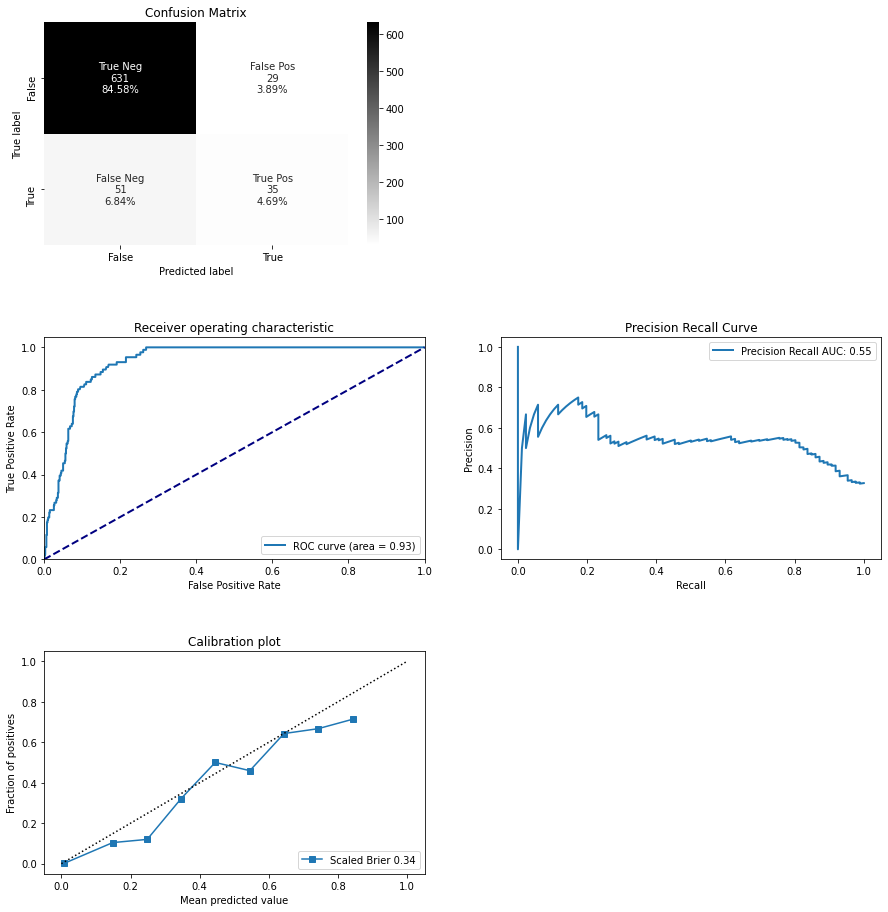

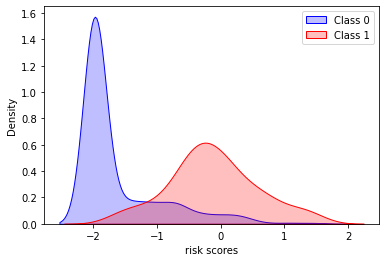

,,
,,
Ground Truth Prevalence,. . .,0.115
Test set Prevalence,. . .,0.086
True positive rate (recall),. . .,0.407
False positive rate,. . .,0.044
Positive predictive value (precision),. . .,0.547
True negative rate (specificity),. . .,0.956
False negative rate,. . .,0.593
Negative predictive value,. . .,0.925
Positive likelihood ratio (bigger is better),. . .,9.262


In [82]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results

In [97]:
evaluate_model(cattuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

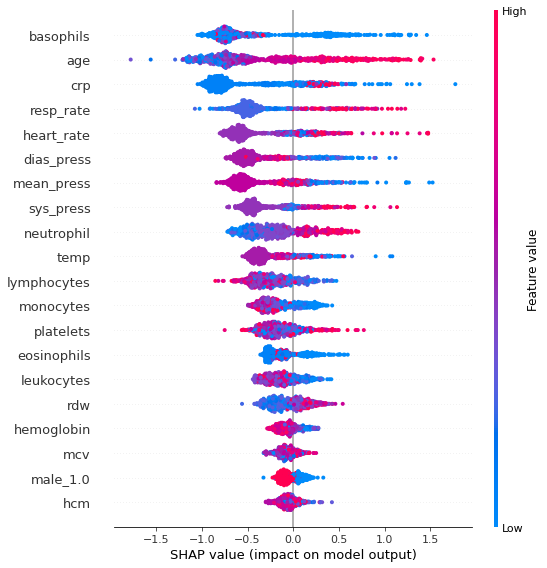

In [83]:
interpret_model(cattuned)

In [84]:
plot_model(cattuned, plot='ktops')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead. You can also use MLFlowUtils.binary_classification_metrics.

In [ ]:
# cattuned

### 2.3.1) Build a model with all data

In [87]:
final_model = finalize_model(cattuned)

In [88]:
str(final_model.__class__.__name__)

'CatBoostClassifier'

In [89]:
final_model_name = str(final_model.__class__.__name__) + '_all_regions_plus_70pct_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
# final_model_name

In [90]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [91]:
final_model

# Use the saved model to predict on specific hospital

In [93]:
import pickle
import joblib

#Carrego o modelo unico
# print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

In [94]:
all_except_one_model.__class__.__name__

'CatBoostClassifier'

In [95]:
# x_test_specific_name

In [96]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(533, 25)

In [97]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [98]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["death"]
y_test_single.shape

(533,)

In [100]:
pd.set_option('display.max_columns', None)
# X_test_single.head()

In [101]:
X_test_single["class"] = y_test_single

In [102]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [103]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [104]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Categorical
temp,Categorical
hemoglobin,Numeric
platelets,Numeric


,class,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
5959,1,0.459,1.258,0.451,1.251,0.874,0.711,-0.198,0.694,0.179,1.432,0.480,-0.093,-0.255,0.016,1.000
6979,0,0.266,0.581,1.359,0.763,1.481,-1.547,0.253,-1.355,-0.124,-0.003,0.571,5.643,1.448,-0.914,1.000
7146,0,0.072,0.064,-1.482,0.018,0.115,-0.477,0.366,-0.648,0.105,-1.533,-1.216,-0.689,-0.351,-1.191,0.000
6938,1,1.296,0.621,-0.133,0.574,0.377,0.354,-0.198,0.228,-0.093,0.359,0.021,-0.018,-0.255,0.486,0.000
6514,0,-1.281,1.855,1.193,1.724,1.730,0.394,-0.930,0.072,-0.118,0.219,0.461,-0.018,-0.255,0.009,1.000


In [105]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [106]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [107]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [108]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [109]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['crp',
 'dias_press',
 'heart_rate',
 'mean_press',
 'resp_rate',
 'sys_press',
 'temp']

### Add missing columns to some hospitals that didn't collect all columns
<!-- e.g. HC_USP (missing: red_cells_count and eosinophils) -->

In [110]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [111]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [112]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'mean_press', 'resp_rate', 'sys_press',
       'temp'],
      dtype='object')

In [113]:
X_test_single_transformed.shape

(533, 22)

In [114]:
X_test_single_transformed.shape

(533, 22)

In [115]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [116]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'mean_press', 'resp_rate', 'sys_press',
       'temp'],
      dtype='object')

**Reorder columns**

In [117]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(533, 22)

0.6901612716092353


[<matplotlib.lines.Line2D at 0x1c7338bbec8>]

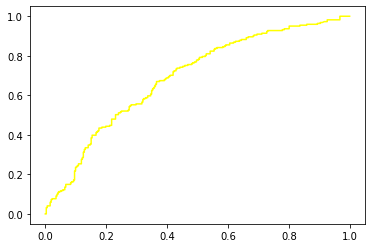

In [118]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - XGBoost - AUC " +  str(auc_ind), color="yellow")

In [119]:
y_pred_prob1.shape

(533,)

In [120]:
y_pred = all_except_one_model.predict(X_test_single_transformed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.053
True positive rate (recall),. . .,0.077
False positive rate,. . .,0.035
Positive predictive value (precision),. . .,0.607
True negative rate (specificity),. . .,0.965
False negative rate,. . .,0.923
Negative predictive value,. . .,0.596
Positive likelihood ratio (bigger is better),. . .,2.182


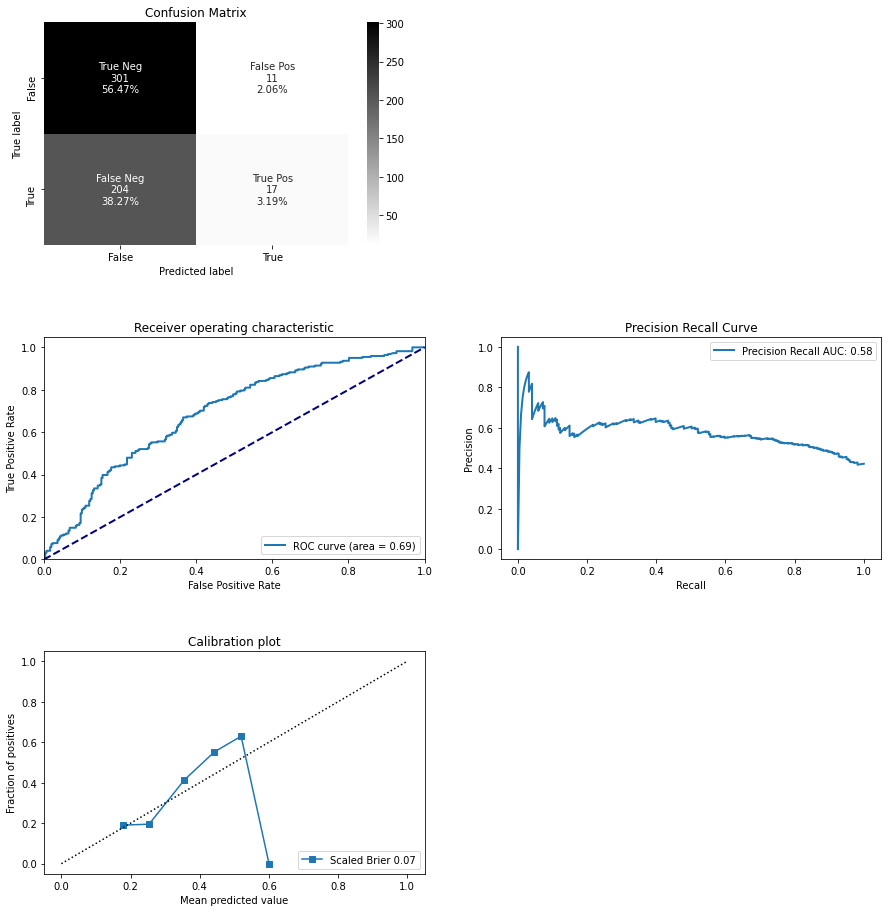

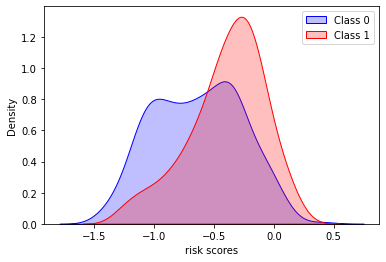

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.053
True positive rate (recall),. . .,0.077
False positive rate,. . .,0.035
Positive predictive value (precision),. . .,0.607
True negative rate (specificity),. . .,0.965
False negative rate,. . .,0.923
Negative predictive value,. . .,0.596
Positive likelihood ratio (bigger is better),. . .,2.182


In [121]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, y_pred_prob1)

In [122]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6901612716092353

In [123]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.65', '0.74']

In [124]:
#recall
tpr(y_test_single, y_pred)

0.07692307692307693

In [125]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.9647435897435898

In [126]:
#accuracy
accuracy(y_test_single, y_pred)

0.5966228893058161

In [127]:
ppv(y_test_single, y_pred)

0.6071428571428571

In [128]:
npv(y_test_single, y_pred)

0.596039603960396

# End of File